# Diplomatura en ciencia de datos, aprendizaje automático y sus aplicaciones - Edición 2023 - FAMAF (UNC)

## Análisis exploratorio y curación de datos

### Trabajo práctico entregable - Grupo 22 - Parte 1

**Integrantes:**
- Chevallier-Boutell, Ignacio José
- Ribetto, Federico Daniel
- Rosa, Santiago
- Spano, Marcelo

**Seguimiento:** Meinardi, Vanesa

---

## Librerías

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sqlalchemy import create_engine, text

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.options.mode.chained_assignment = None  # default='warn'

sns.set_context('talk')
sns.set_theme(style='white')

## Acerca de los datasets

El dataset a utilizar proviene de la [compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia. Particularmente, utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Este [dataset](https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv) está disponible en internet, desde donde lo usaremos.

Por otro lado, vamos a aumentar los datos presentes en dicho conjunto utilizando un dataset similar: las publicaciones de la plataforma AirBnB en Melbourne en el año 2018. El objetivo es estimar con mayor precisión el valor del vecindario de cada propiedad. Este otro [dataset](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv), también disponible en internet, es un conjunto de datos de *scrapings* del sitio realizado por [Tyler Xie](https://www.kaggle.com/tylerx), también disponible en una competencia de Kaggle.

---
# Ejercicio 1 - SQL

## 1) Conexión

Para poder ejecutar consultas simples en SQL con SQLAlchemy, primero debemos crear un ***engine***: es el punto de partida para cualquier aplicación que hagamos de SQLAlchemy, proporcionando una forma de conectarse e interactuar con la base de datos. El mismo provee además:
- Una ***connection pool***: conjunto de conexiones a la base de datos que permanecen activas por largos períodos de tiempo y se pueden reutilizar eficientemente, previniendo el *overhead* que deviene de la creación de nuevas conexiones, y aumentando la velocidad de funcionamiento.
- Un **dialecto**: SQLAlchemy puede trabajar con muchos tipos de bases de datos, siendo cada uno de estos tipos un dialecto diferente (MySQL, PostgreSQL, Oracle, SQLite, etcétera).

En nuestro caso el dialecto será SQLite y la ingesta de datos se hará en la base de datos database.sqlite3, por lo que instanciamos el *engine* de la siguiente manera:

In [2]:
# echo flag logs the SQL queries executed by the engine. It’s helpful for
# debugging purposes (True), but don’t use it in a production environmen (False)
engine = create_engine('sqlite:///database.sqlite3', echo=True)

## 2) Ingesta de datos

### Lectura de datos

#### Datos de la competencia Kaggle

Leemos los datos de la competencia Kaggle utilizando pandas. Vemos que en total consta de 13.580 registros con respuestas a 21 variables diferentes.

In [3]:
# Lectura del csv
url_kag = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv'
melb_df = pd.read_csv(url_kag)
total_ans_kag = len(melb_df)
print(f'Cantidad de respuestas en el dataset de Kaggle: {total_ans_kag}')
display(melb_df[:3])

Cantidad de respuestas en el dataset de Kaggle: 13580


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
print('--- Información disponible en el dataset de Kaggle ---')
keys_kag = melb_df.keys()
print(f'Contiene un total de {len(keys_kag)} columnas:')
for k in range(len(keys_kag)):
    print(f'{k+1}) {keys_kag[k]}')

--- Información disponible en el dataset de Kaggle ---
Contiene un total de 21 columnas:
1) Suburb
2) Address
3) Rooms
4) Type
5) Price
6) Method
7) SellerG
8) Date
9) Distance
10) Postcode
11) Bedroom2
12) Bathroom
13) Car
14) Landsize
15) BuildingArea
16) YearBuilt
17) CouncilArea
18) Lattitude
19) Longtitude
20) Regionname
21) Propertycount


#### Datos de Airbnb

Leemos los datos de Airbnb utilizando pandas. Vemos que en total consta de 22.895 registros con respuestas a 84 variables diferentes, *i.e.* tiene 9.315 registros más que en el dataset de Kaggle y responde a 63 variables más.

In [5]:
# Lectura del csv
url_air = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv'
airbnb_df = pd.read_csv(url_air)
total_ans_air = len(airbnb_df)
print(f'Cantidad de respuestas en el dataset de Airbnb: {total_ans_air}')
display(airbnb_df[:3])

Cantidad de respuestas en el dataset de Airbnb: 22895


/tmp/ipykernel_20145/4026226426.py:3: DtypeWarning: Columns (35,77) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_df = pd.read_csv(url_air)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighborhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighborhood,city,suburb,state,zipcode,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,9835,https://www.airbnb.com/rooms/9835,2.018120e+13,12/7/2018,Beautiful Room & House,NaN,"House: Clean, New, Modern, Quite, Safe. 10Km f...","House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,NaN,"YES ! The bus (305,309) is exactly two blocks ...","Kitchen, backyard, upstairs lounge. We'd like ...",As much as the guest wants.,Prefence would be given females or a couple,https://a0.muscache.com/im/pictures/44620/5a58...,33057,https://www.airbnb.com/users/show/33057,Manju,8/21/2009,AU,About us: We are an East Indian couple in our ...,a few days or more,0%,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,NaN,"['email', 'phone', 'reviews']",f,f,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,"Bulleen, Australia",AU,Australia,-37.772684,145.092133,f,House,Private room,2,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,""Pets live on this property"",Do...",60,NaN,NaN,NaN,NaN,1,22,1,365,17 months ago,t,30,60,90,365,12/7/2018,4,5/24/2011,9/12/2015,90.0,9.0,10.0,10.0,10.0,9.0,9.0,f,NaN,f,strict_14_with_grace_period,f,f,1,0.04
1,10803,https://www.airbnb.com/rooms/10803,2.018120e+13,12/7/2018,Room in Cool Deco Apartment in Brunswick,A large air conditioned room with queen spring...,The apartment is Deco/Edwardian in style and h...,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,NaN,Easy transport options - the tram is right out...,Wifi. Bathroom and kitchen is shared but I mos...,I'm home mostly but sometimes I may be working...,Theres a yoga studio downstairs so if you see ...,https://a0.muscache.com/im/pictures/31323790/9...,38901,https://www.airbnb.com/users/show/38901,Lindsay,9/16/2009,"Melbourne, Victoria, Australia",As an artist working in animation and video I ...,NaN,NaN,f,https://a0.muscache.com/im/users/38901/profile...,https://a0.muscache.com/im/users/38901/profile...,Brunswick,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,"Brunswick East, Australia",AU,Australia,-37.766505,144.980736,t,Apartment,Private room,2,1.0,1.0,1.0,Futon,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,H...",35,200.0,803.0,0.0,9.0,1,15,3,45,6 weeks ago,t,4,9,33,213,12/7/2018,108,1/12/2013,11/26/2018,87.0,9.0,8.0,9.0,9.0,9.0,9.0,f,NaN,t,moderate,t,t,1,1.50
2,12936,https://www.airbnb.com/rooms/12936,2.018120e+13,12/7/2018,St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,FREE WiFi FREE in-building remote controlled g...,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,First floor apartment with both lift and stair...,Our apartment is

In [6]:
print('--- Información disponible en el dataset de Airbnb ---')
keys_air = airbnb_df.keys()
print(f'Contiene un total de {len(keys_air)} columnas:')
for k in range(len(keys_air)):
    print(f'{k+1}) {keys_air[k]}')

--- Información disponible en el dataset de Airbnb ---
Contiene un total de 84 columnas:
1) id
2) listing_url
3) scrape_id
4) last_scraped
5) name
6) summary
7) space
8) description
9) neighborhood_overview
10) notes
11) transit
12) access
13) interaction
14) house_rules
15) picture_url
16) host_id
17) host_url
18) host_name
19) host_since
20) host_location
21) host_about
22) host_response_time
23) host_response_rate
24) host_is_superhost
25) host_thumbnail_url
26) host_picture_url
27) host_neighborhood
28) host_verifications
29) host_has_profile_pic
30) host_identity_verified
31) street
32) neighborhood
33) city
34) suburb
35) state
36) zipcode
37) smart_location
38) country_code
39) country
40) latitude
41) longitude
42) is_location_exact
43) property_type
44) room_type
45) accommodates
46) bathrooms
47) bedrooms
48) beds
49) bed_type
50) amenities
51) price
52) weekly_price
53) monthly_price
54) security_deposit
55) cleaning_fee
56) guests_included
57) extra_people
58) minimum_night

Vamos a reducir el dataframe y quedarnos sólo con aquellas columnas que consideramos relevantes para el análisis que pretendemos hacer. Coincide que son 21 variables, pero no necesariamente la relación es 1:1 con las variables de Kaggle.

In [7]:
int_cols_air = [
    'host_location', 'host_neighborhood', 'street', 'neighborhood', 'city',
    'suburb', 'state', 'zipcode', 'latitude', 'longitude', 'is_location_exact',
    'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
    'beds', 'bed_type', 'price', 'weekly_price', 'monthly_price'
]

airbnb_df = airbnb_df[int_cols_air]
display(airbnb_df[:3])

,host_location,host_neighborhood,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,weekly_price,monthly_price
0,AU,NaN,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.772684,145.092133,f,House,Private room,2,1.0,1.0,2.0,Real Bed,60,NaN,NaN
1,"Melbourne, Victoria, Australia",Brunswick,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.766505,144.980736,t,Apartment,Private room,2,1.0,1.0,1.0,Futon,35,200.0,803.0
2,"Melbourne, Victoria, Australia",St Kilda,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.859755,144.977369,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,159,1253.0,4452.0


### Procesamiento de códigos postales

Queremos combinar los datos de Airbnb con los datos de Kaggle. Para ello utilizaremos el código postal como clave común: 'Postcode' en melb_df y 'zipcode' en airbnb_df. Antes que anda, debemos asegurarnos que las columnas se encuentren limpias y con un formato común.

Por un lado, vemos que 'Postcode' en melb_df tiene un formato común: son todos float con un 1 decimal. Vamos a pasarlos todos a enteros.

In [8]:
print('Formato original de los datos:')
display(melb_df['Postcode'].value_counts().iloc[:10])
print('---------------------------------------------------------------------\n')
melb_df['postcode_int'] = melb_df['Postcode'].fillna(0).astype('int')
print('Datos pasados a enteros:')
display(melb_df['postcode_int'].value_counts().iloc[:10])

Formato original de los datos:


3073.0    359
3020.0    306
3121.0    292
3040.0    290
3046.0    284
3165.0    249
3058.0    246
3163.0    245
3012.0    242
3072.0    239
Name: Postcode, dtype: int64

---------------------------------------------------------------------

Datos pasados a enteros:


3073    359
3020    306
3121    292
3040    290
3046    284
3165    249
3058    246
3163    245
3012    242
3072    239
Name: postcode_int, dtype: int64

Por otra parte , vemos que 'zipcode' en airbnb_df tiene una mezcla de formatos: algunos son float con un 1 decimal y otros son enteros. Vamos a pasarlos todos a enteros.

In [9]:
print('Formato original de los datos:')
display(airbnb_df['zipcode'].value_counts()[:10])
print('---------------------------------------------------------------------\n')
# Se estandariza el tipo de datos para la columna zipcode
airbnb_df['zipcode'] = pd.to_numeric(airbnb_df.zipcode, errors='coerce')
airbnb_df['zipcode_int'] = airbnb_df['zipcode'].fillna(0).astype('int')
print('Datos pasados a enteros:')
display(airbnb_df['zipcode_int'].value_counts()[:10])


Formato original de los datos:


3000.0    2491
3000       876
3006.0     860
3182.0     579
3182       556
3004.0     555
3141.0     526
3008.0     506
3006       408
3121.0     371
Name: zipcode, dtype: int64

---------------------------------------------------------------------

Datos pasados a enteros:


3000    3367
3006    1268
3182    1135
3141     881
3004     728
3121     628
3008     616
3053     538
3181     460
3056     446
Name: zipcode_int, dtype: int64

### Ingesta

Transcribimos todos los registros de melb_df a la tabla "Kaggle" de la base de datos SQL creada previamente.

In [10]:
melb_df.to_sql('kaggle', con=engine, if_exists="replace")

2023-05-28 16:23:51,078 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("kaggle")
2023-05-28 16:23:51,079 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-05-28 16:23:51,080 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("kaggle")
2023-05-28 16:23:51,080 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-05-28 16:23:51,082 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2023-05-28 16:23:51,082 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-05-28 16:23:51,083 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("kaggle")
2023-05-28 16:23:51,084 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-05-28 16:23:51,085 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2023-05-28 16:23:51,086 INFO sqlalchemy.engine.Engine [raw sql] ('kaggle',)
2023-05-28 16:23:51,087 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("kaggle")
202

13580

Transcribimos todos los registros de airbnb_df a la tabla "airbnb" de la base de datos SQL creada previamente.

In [11]:
airbnb_df.to_sql('airbnb', con=engine, if_exists="replace")

2023-05-28 16:23:51,399 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb")
2023-05-28 16:23:51,399 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-05-28 16:23:51,403 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb")
2023-05-28 16:23:51,404 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-05-28 16:23:51,406 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2023-05-28 16:23:51,406 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-05-28 16:23:51,407 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("airbnb")
2023-05-28 16:23:51,407 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-05-28 16:23:51,409 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2023-05-28 16:23:51,409 INFO sqlalchemy.engine.Engine [raw sql] ('airbnb',)
2023-05-28 16:23:51,410 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("airbnb")
202

22895

## 3) Consultas

A la hora de ejecutar consultas SQL, no debemos hacerlo directamente con el *engine*, sino que debemos hacerlo a través de instancia de conexión, la cual se crea con `engine.connect()`, apartádose momentáneamente del *connection pool*. 

En términos de desempeño, es muy importante cerrar las conexiones luego de utilizarlas. Al cerrar la conexión (`.close()`), la conexión se recicla y vuelve al *pool* para ser reutilizada, lo cual previene el overhead de creación. Una alternativa al cierre de la conexión para su reciclaje es utilizar un bloque `with()`: la conexión se cerrará automáticamente luego de que se ejecute el bloque de código dentro del `with()`.

Otra cosa a tener en cuenta es que alimentar la ejecución con una *string* pelada está deprecado, debiendo usar en su lugar la función `text()` dentro de sqlalchemy para proveer la consulta SQL.

Considerando todo lo dicho, definimos una función para facilitar la ejecución de consultas.

**Observación:** la consigna pide distinguir por ciudad y por ciudad+barrio. Estos datos sólo están disponibles en la base de datos de Airbnb, así que las consultas se realizarán sobre la tabla correspondiente.

In [12]:
def execute_query(query):
  with engine.connect() as con:
    rs = con.execute(text(query))
    df_rs = pd.DataFrame(rs.fetchall())
  return df_rs

### Cantidad de registros totales por ciudad

Veamos la cantidad de registros totales por ciudad, agrupando por la columna *city*. Ordenamos además de mayor a menor cantidad de registros. Tenemos que Melbourne va a la cabeza con 7368, seguido por Port Phillip con 2808.

In [13]:
query_city = """SELECT city AS Ciudad, COUNT(*) AS Registros
                FROM airbnb
                GROUP BY city
                ORDER BY Registros DESC"""
df_city = execute_query(query_city)
df_city.head(10)

2023-05-28 16:23:51,909 INFO sqlalchemy.engine.Engine SELECT city AS Ciudad, COUNT(*) AS Registros
                FROM airbnb
                GROUP BY city
                ORDER BY Registros DESC
2023-05-28 16:23:51,909 INFO sqlalchemy.engine.Engine [generated in 0.00051s] ()


,Ciudad,Registros
0,Melbourne,7368
1,Port Phillip,2808
2,Yarra,2049
3,Stonnington,1621
4,Moreland,967
5,Yarra Ranges,771
6,Darebin,698
7,Boroondara,664
8,Glen Eira,631
9,Whitehorse,614


### Cantidad de registros totales por barrio y ciudad

Veamos ahora la cantidad de registros totales por barrio y por ciudad, agrupando por las columnas *neighborhood* y *city*. Ordenamos además de mayor a menor cantidad de registros. Al considerar los barrios, tenemos que Melbourne sigue encabezando la lista, siendo Central Business District y Southbank los dos mayoritarios, con 3726 y 1204 registros, respectivamente

va a la cabeza con 7368, seguido por Port Phillip con 2808.

In [14]:
query_neighborhood_city = """SELECT neighborhood AS Barrio, city AS Ciudad, COUNT(*) AS Registros
                FROM airbnb
                GROUP BY neighborhood, city
                ORDER BY Registros DESC"""
df_neighborhood_city = execute_query(query_neighborhood_city)
df_neighborhood_city.head(10)

2023-05-28 16:23:51,930 INFO sqlalchemy.engine.Engine SELECT neighborhood AS Barrio, city AS Ciudad, COUNT(*) AS Registros
                FROM airbnb
                GROUP BY neighborhood, city
                ORDER BY Registros DESC
2023-05-28 16:23:51,931 INFO sqlalchemy.engine.Engine [generated in 0.00098s] ()


,Barrio,Ciudad,Registros
0,Central Business District,Melbourne,3726
1,Southbank,Melbourne,1204
2,St Kilda,Port Phillip,1082
3,None,Yarra Ranges,771
4,South Yarra,Stonnington,759
5,Brunswick,Moreland,681
6,Carlton,Melbourne,582
7,Docklands,Melbourne,576
8,None,Whitehorse,574
9,Richmond,Yarra,547


## 4) Combinación de tablas

Considerando que nuestro objetivo es combinar ambas tablas, ampliando así la información disponible en el dataset de Kaggle sobre el valor del vecindario de la propiedad con información proveniente del dataset de AirBnB, utilizaremos de esta última tabla lo siguientes promedios asociados al código postal:
* Promedio del precio diario (`price`).
* Promedio del precio semanal (`weekly_price`).
* Promedio del precio mensual (`monthly_price`).

Consideremos además el conteo de cuántos registros responden a cada uno de estos promedios, para así tener una manera de ponderar la relevancia que nos aporta cada uno de estos datos a la hora de extraer conclusiones.

Para lograr esto usando el comando `JOIN` de SQL, ejecutamos una subconsulta, donde se define una tabla `airbnb_agg` con todas las agregaciones deseadas. Finalmente, esta nueva tabla es combinada con la tabla de Kaggle considerando los códigos postales.

In [15]:
query_join = """WITH airbnb_agg AS (
                  SELECT zipcode_int, 
                    AVG(price) AS airbnb_daily_mean,
                    COUNT(price) AS airbnb_daily_count,
                    AVG(weekly_price) AS airbnb_weekly_mean,
                    COUNT(weekly_price) AS airbnb_weekly_count,
                    AVG(monthly_price) AS airbnb_monthly_mean,
                    COUNT(monthly_price) AS airbnb_monthly_count
                  FROM airbnb
                  GROUP BY zipcode_int
                )
                SELECT * FROM Kaggle A
                LEFT JOIN airbnb_agg B 
                ON A.Postcode_int = B.zipcode_int"""
df_join = execute_query(query_join)

2023-05-28 16:23:51,960 INFO sqlalchemy.engine.Engine WITH airbnb_agg AS (
                  SELECT zipcode_int, 
                    AVG(price) AS airbnb_daily_mean,
                    COUNT(price) AS airbnb_daily_count,
                    AVG(weekly_price) AS airbnb_weekly_mean,
                    COUNT(weekly_price) AS airbnb_weekly_count,
                    AVG(monthly_price) AS airbnb_monthly_mean,
                    COUNT(monthly_price) AS airbnb_monthly_count
                  FROM airbnb
                  GROUP BY zipcode_int
                )
                SELECT * FROM Kaggle A
                LEFT JOIN airbnb_agg B 
                ON A.Postcode_int = B.zipcode_int
2023-05-28 16:23:51,961 INFO sqlalchemy.engine.Engine [generated in 0.00084s] ()


In [16]:
df_join.sample(10)

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,postcode_int,zipcode_int,airbnb_daily_mean,airbnb_daily_count,airbnb_weekly_mean,airbnb_weekly_count,airbnb_monthly_mean,airbnb_monthly_count
12403,12403,Sunbury,20 Brett Ct,4,h,570000.0,S,Barry,3/09/2017,31.7,3429.0,4.0,2.0,2.0,693.0,174.0,1995.0,None,-37.57029,144.71163,Western Metropolitan,14092.0,3429,3429.0,131.291667,24.0,NaN,0.0,NaN,0.0
10103,10103,Armadale,8/74 Denbigh Rd,2,u,410000.0,VB,hockingstuart,27/05/2017,6.3,3143.0,2.0,1.0,0.0,1097.0,63.0,1967.0,Stonnington,-37.85549,145.01630,Southern Metropolitan,4836.0,3143,3143.0,192.463768,69.0,743.181818,11.0,3130.500000,10.0
10231,10231,Dingley Village,1/270 Spring Rd,2,u,595000.0,S,Ray,27/05/2017,22.2,3172.0,2.0,1.0,1.0,2256.0,NaN,1980.0,Kingston,-37.98110,145.13807,South-Eastern Metropolitan,3940.0,3172,3172.0,79.666667,12.0,680.000000,1.0,2500.000000,1.0
1989,1989,Coburg,11 Station St,3,h,725000.0,S,Brad,23/04/2016,7.8,3058.0,3.0,1.0,0.0,238.0,131.0,1900.0,Moreland,-37.75390,144.96120,Northern Metropolitan,11204.0,3058,3058.0,103.105263,133.0,896.055556,18.0,3624.166667,12.0
5775,5775,St Kilda,59 Clyde St,3,h,1891000.0,S,Marshall,4/03/2017,6.1,3182.0,3.0,2.0,3.0,384.0,123.0,1915.0,Port Phillip,-37.86450,144.98050,Southern Metropolitan,13240.0,3182,3182.0,147.729515,1135.0,1051.441026,195.0,3847.400000,155.0
9522,9522,Elwood,3/11 Scott St,2,u,550000.0,VB,Domain,17/06/2017,7.2,3184.0,2.0,1.0,1.0,605.0,NaN,1970.0,Port Phillip,-37.87987,144.99252,Southern Metropolitan,8989.0,3184,3184.0,147.453731,335.0,1099.962963,54.0,3581.272727,44.0
12888,12888,Albert Park,123 Richardson St,4,h,2550000.0,S,Marshall,19/08/2017,3.0,3206.0,4.0,2.0,NaN,152.0,175.0,1910.0,None,-37.84663,144.95681,Southern Metropolitan,3280.0,3206,3206.0,229.418033,122.0,1187.400000,25.0,3734.000000,19.0
11545,11545,West Melbourne,74 Dudley St,4,h,1900000.0,VB,Whiting,15/07/2017,3.1,3003.0,4.0,1.0,2.0,168.0,NaN,NaN,Melbourne,-37.80884,144.95291,Northern Metropolitan,2230.0,3003,3003.0,130.205993,267.0,760.200000,10.0,2629.500000,8.0
5399,5399,Richmond,320 Church St,3,h,1651000.0,S,Jellis,24/09/2016,2.6,3121.0,3.0,2.0,1.0,192.0,111.0,1900.0,Yarra,-37.82120,144.99850,Northern Metropolitan,14949.0,3121,3121.0,162.262739,628.0,1089.068182,88.0,3771.906250,64.0
10943,10943,Bundoora,84 Linacre Dr,4,h,1300000.0,S,Barry,12/08/2017,12.1,3083.0,4.0,2.0,2.0,637.0,NaN,NaN,Whittlesea,-37.68646,145.08183,Northern Metropolitan,10175.0,3083,3083.0,84.137931,87.0,702.500000,2.0,2291.500000,2.0


---
# Ejercicio 2 - Pandas

<span style="color:green;font-size:18px">
    Consigna >>>>
</span>

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

<span style="color:green;font-size:18px">
    <<<< Consigna
</span>

## 1. 

<span style="color:green;font-size:18px">
    Consigna >>>>
</span>

Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

<span style="color:green;font-size:18px">
    <<<< Consigna
</span>

Leemos el dataset nuevamente con Pandas

In [17]:
df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


Separamos las columnas categóricas de las numéricas

In [18]:
cols = df.columns
num_cols = ['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'Lattitude', 'Longtitude', 'Propertycount']
cat_cols = [x for x in cols if x not in num_cols and x != 'index']

### Análisis de variables numéricas

Vemos la correlación de las variables numéricas con el precio

In [19]:
df[num_cols].corr()['Price']

Rooms            0.496634
Price            1.000000
Distance        -0.162522
Bedroom2         0.475951
Bathroom         0.467038
Car              0.238979
Landsize         0.037507
BuildingArea     0.090981
YearBuilt       -0.323617
Lattitude       -0.212934
Longtitude       0.203656
Propertycount   -0.042153
Name: Price, dtype: float64

Se realiza un scatterplot del Precio en función de todas las variables numéricas

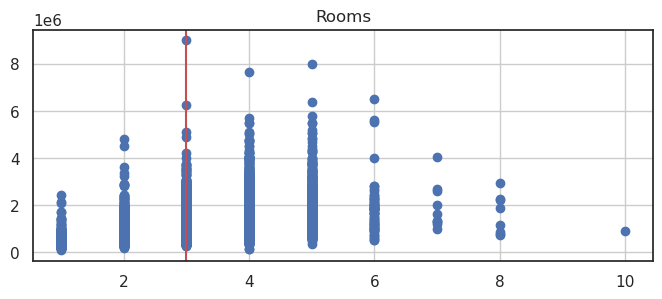

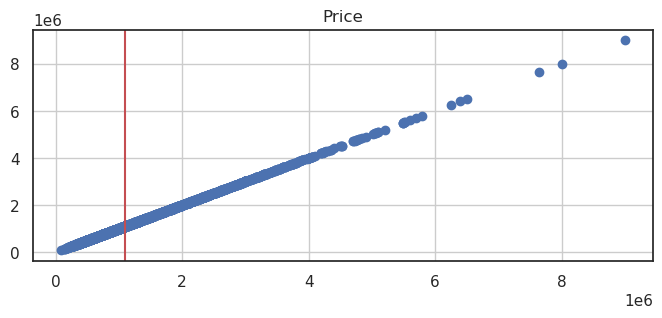

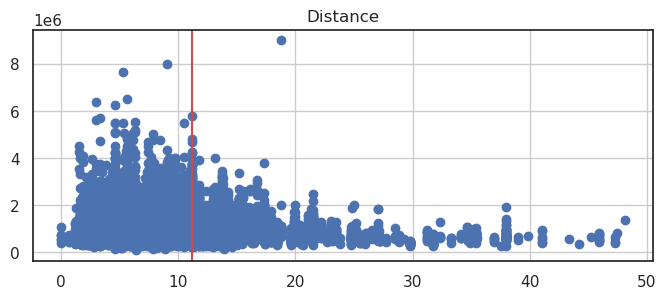

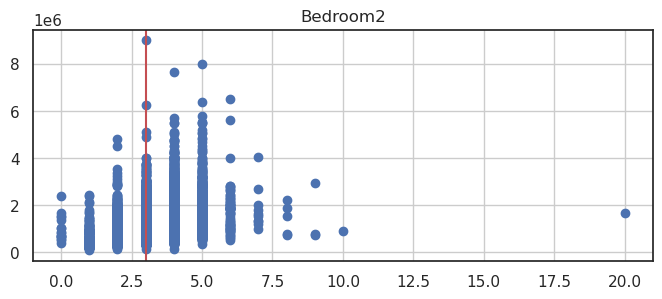

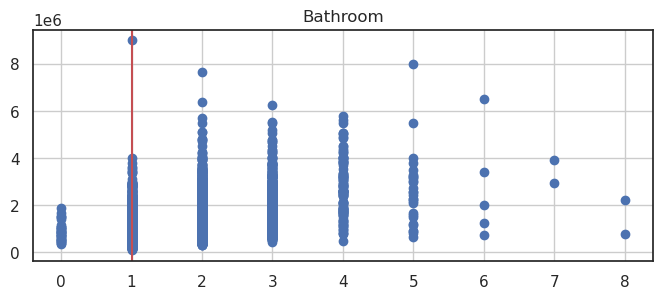

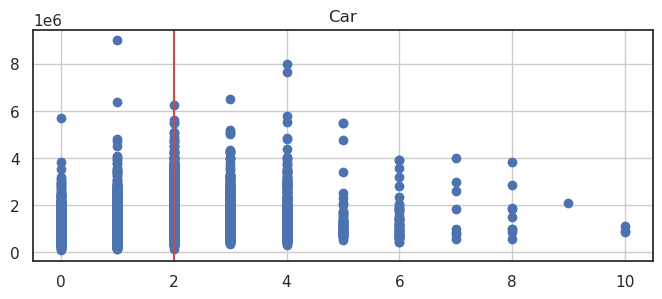

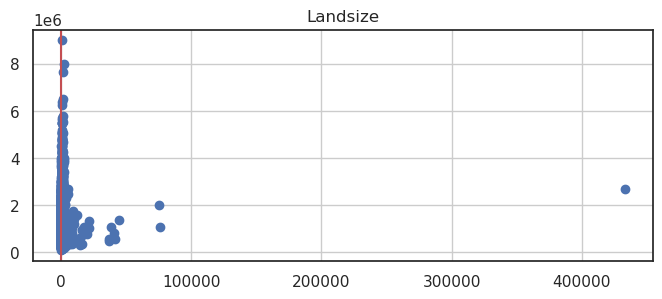

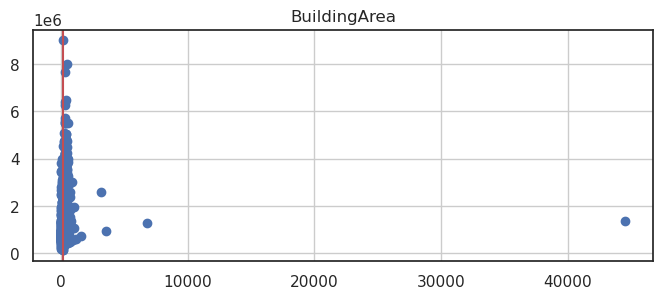

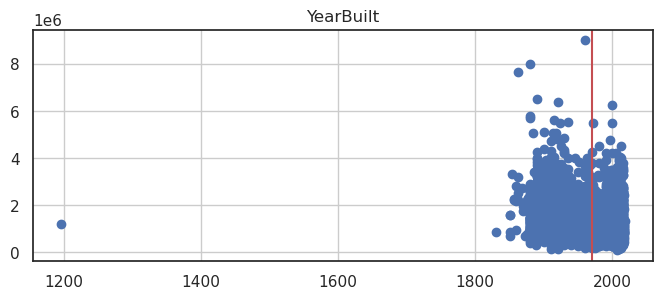

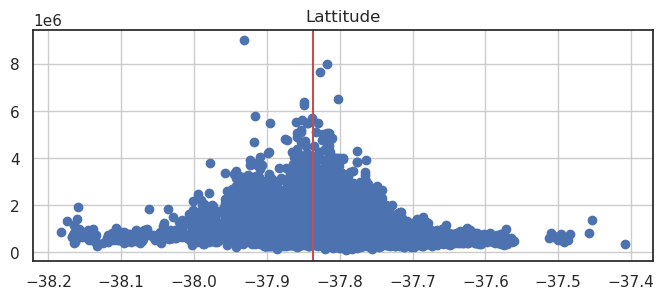

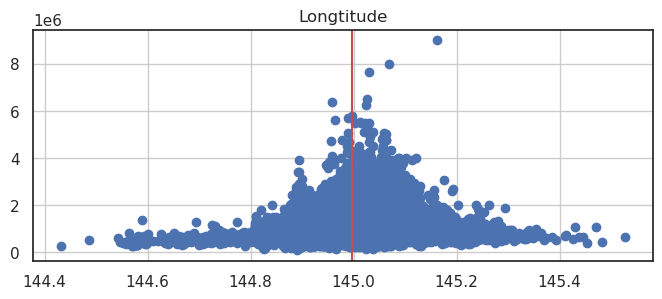

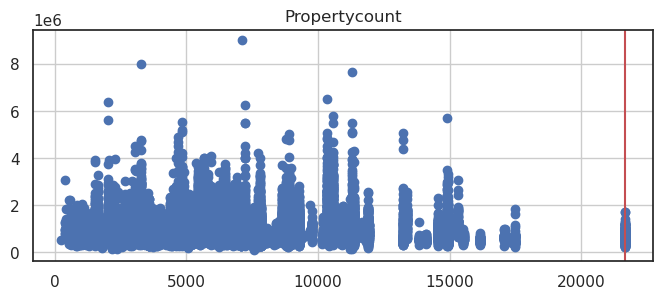

In [20]:
for col in num_cols:
  plt.figure(figsize=(8,3))
  plt.scatter(df[col], df['Price'])
  plt.axvline(df[col].mode()[0], color='r')
  plt.grid()
  plt.title(col)
  plt.show()

Outliers:
- En la variable Bedroom2 vemos que tiene un valor extremo = 20.
- En la variable Landsize vemos que tiene un valor extremo > 400000
- En la variable BuildingArea vemos que tiene un valor extremo > 40000
- En la variable YearBuilt vemos que tiene un valor extremo en 1200

Quitamos estos valores extremos

In [21]:
df = df[df['Bedroom2'] < 20]
df = df[df['Landsize'] < 400000]
df = df[df['BuildingArea'] < 40000]
df = df[df['YearBuilt'] > 1200]

Veamos nuevamente la correlación

In [22]:
corr = df_join[num_cols].corr()['Price']
corr

Rooms            0.496634
Price            1.000000
Distance        -0.162522
Bedroom2         0.475951
Bathroom         0.467038
Car              0.238979
Landsize         0.037507
BuildingArea     0.090981
YearBuilt       -0.323617
Lattitude       -0.212934
Longtitude       0.203656
Propertycount   -0.042153
Name: Price, dtype: float64

Realizamos boxplots para las variables discretas

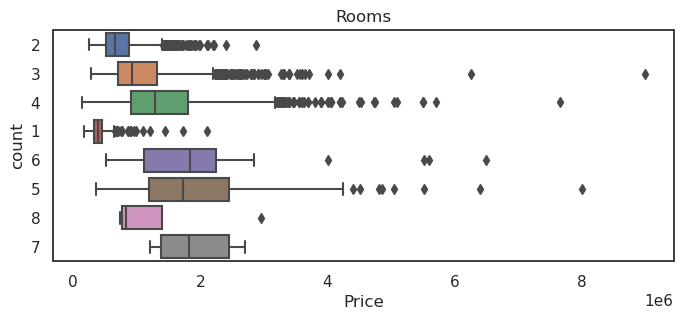

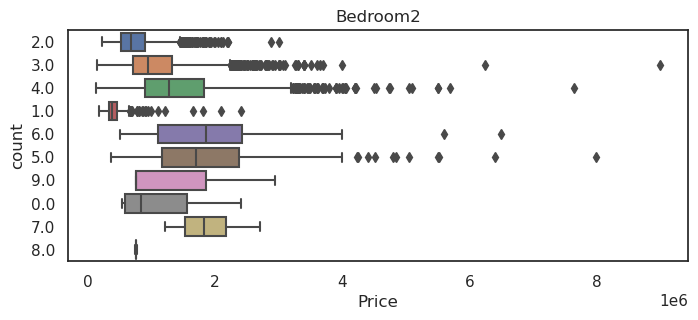

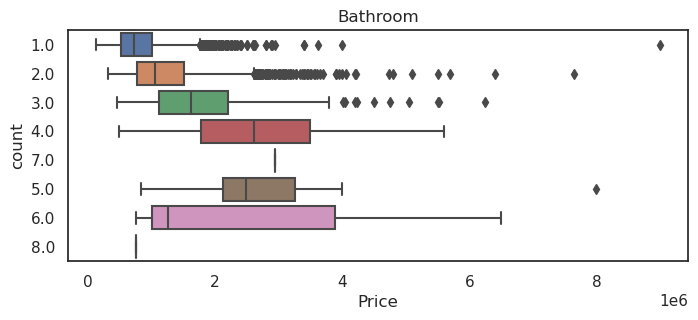

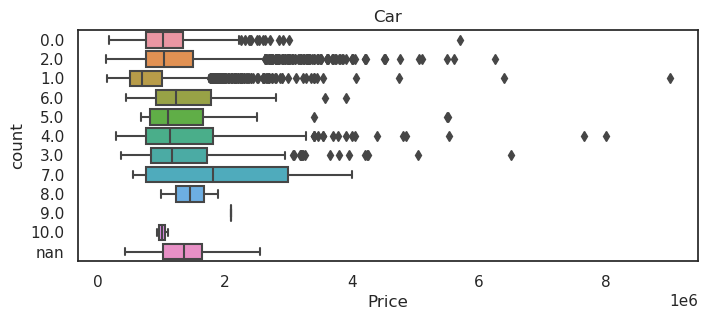

In [23]:
discrete_cols = ['Rooms', 'Bedroom2', 'Bathroom', 'Car']
for col in discrete_cols:
  df_var = df[[col, 'Price']]
  df_var['count'] = df_var[col].astype(str)
  plt.figure(figsize=(8,3))
  sns.boxplot(data=df_var, x='Price', y='count')
  plt.title(col)
  plt.show()

Separamos a las variables continuas en 6 cuantiles y realizamos los boxplots del Precio.

Se eligen 6 ya que para más cuantiles el código da el siguiente error:

"ValueError: Bin labels must be one fewer than the number of bin edges"

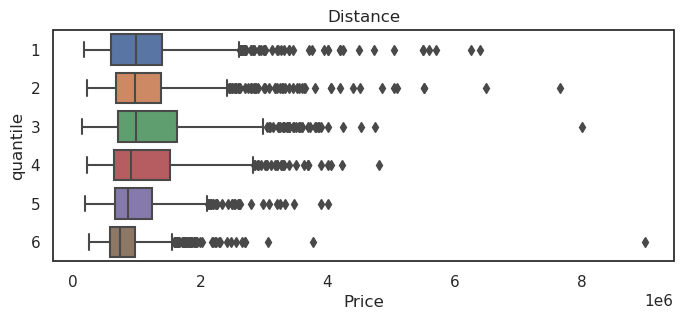

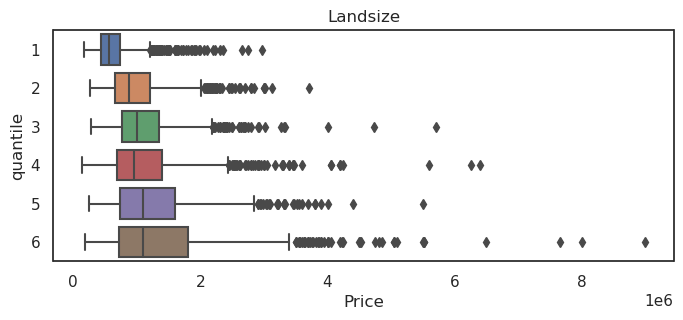

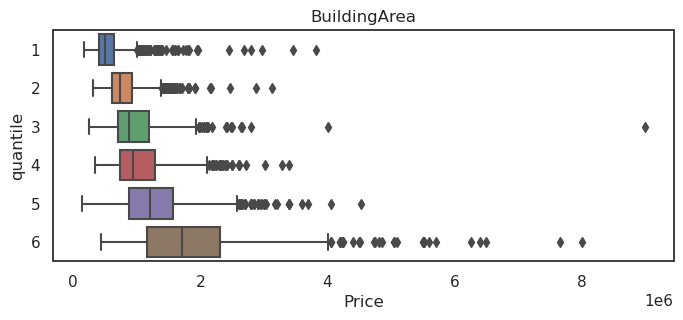

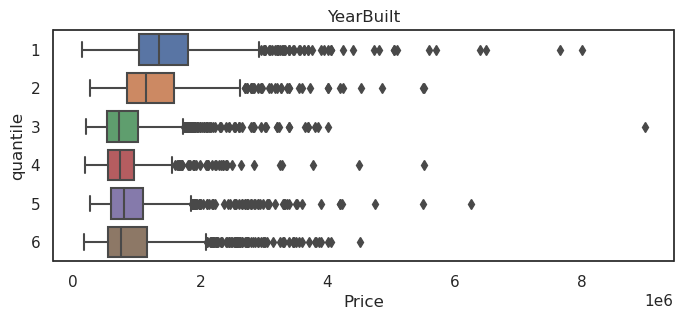

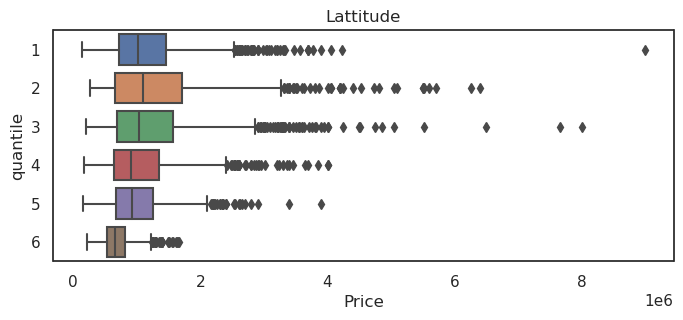

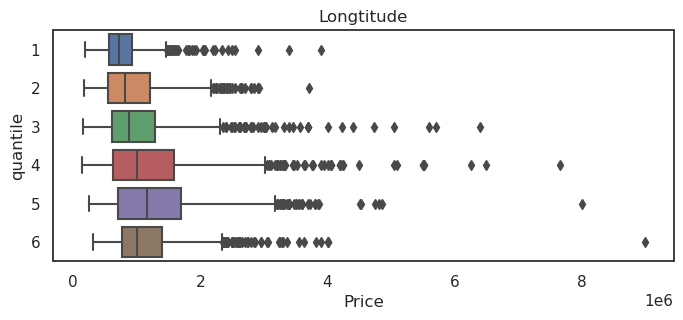

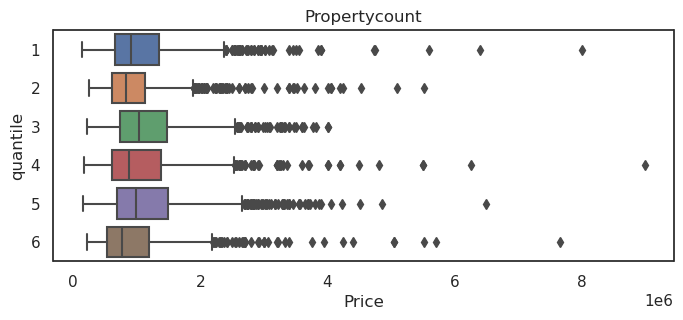

In [24]:
continuous_cols = [x for x in num_cols if x not in discrete_cols and x!='Price']
for col in continuous_cols:
  df_var = df[[col, 'Price']]
  df_var['quantile'] = pd.qcut(df_var[col], 6, labels=['1','2','3','4','5','6'])
  plt.figure(figsize=(8,3))
  sns.boxplot(data=df_var, x='Price', y='quantile')
  plt.title(col)
  plt.show()

Viendo la correlación y los gráficos anteriores tomamos deciciones respecto a cada columna:


*   Rooms: La correlación con el Precio es de 0.52 por lo que consideramos que es importante para la predicción del valor de la propiedad.
*   Bedroom2: La correlación con el Precio es de 0.5 por lo que consideramos que es importante para la predicción del valor de la propiedad.
*   Bathroom: La correlación con el Precio es de 0.49 por lo que consideramos que es importante para la predicción del valor de la propiedad.
*   Car: La correlación Con el Precio es de 0.25. Viendo el scatterplot y el boxplot de la variable Car no se ve una relación clara con el Precio por lo que la descartamos.
*   Distance: Si bien la correlación con el Precio es relativamente baja (-0.16), se puede observar que para valores en el scatterplot que para valores menores a 20, el precio alcanza los valores más altos mientras que para valores mayores a 20 el precio permanece acotado a valores pequeños. Por esta razón la consideramos en el dataset.
*   Landsize: Se puede observar en el boxplot que las distribuciones son diferentes para cada cuantil, por lo que consideramos que es una variable importante para predecir el valor de la propiedad y la consideramos en el dataset.
*   BuildingArea: Sucede lo mismo que en la variable Landsize, además que posee una correlación alta con el Precio, por lo que la consideramos en el dataset. 
*   YearBuilt: En el boxplot se puede observar que para cuantiles más bajos (1 y 2) el Precio alcanza valores mayores que para el resto de los cuantiles. Además la correlación es negativa, lo que tiene sentido suponiendo que, cuando más vieja es la propiedad, esta pierde valor. La consideramos en el dataset.
*   Lattitude: En el boxplot se puede observar que para cuantiles intermedios (2 y 3) el Precio alcanza valores mayores que para el resto de los cuantiles. La consideramos en el dataset.
*   Longitude: En el boxplot se puede observar que para cuantiles intermedios (4 y 5) el Precio alcanza valores mayores que para el resto de los cuantiles. La consideramos en el dataset.
*   Propertycount: La correlación Con el Precio es de -0.05. Viendo el scatterplot y el boxplot de la variable Propertycount no se ve una relación clara con el Precio por lo que la descartamos.



In [25]:
selected_num_cols = ['Rooms', 'Bedroom2', 'Bathroom', 'Distance', 'Landsize',
                    'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude']

### Análisis de variables categóricas

In [26]:
cat_cols

['Suburb',
 'Address',
 'Type',
 'Method',
 'SellerG',
 'Date',
 'Postcode',
 'CouncilArea',
 'Regionname']

Veamos la cardinalidad de cada una y el porcentaje de repeticiones que tienen las 10 categorías con mayor cantidad:

In [27]:
for col in cat_cols:
  print(col)
  print('Cardinalidad:', df[col].nunique())
  print(100*df[col].value_counts(normalize=True).iloc[:10])
  print()

Suburb
Cardinalidad: 300
Reservoir         2.479218
Richmond          2.085460
Brunswick         1.910456
Bentleigh East    1.677118
Coburg            1.604200
Essendon          1.531282
Preston           1.472947
Hawthorn          1.429196
Yarraville        1.400029
Glenroy           1.356278
Name: Suburb, dtype: float64

Address
Cardinalidad: 6771
1/1 Clarendon St    0.043751
36 Aberfeldie St    0.043751
34 Soudan St        0.029167
12 Witchwood Cl     0.029167
66 Roseberry St     0.029167
3/39 Dover St       0.029167
13 Robinson St      0.029167
2 May St            0.029167
2/7 Gordon St       0.029167
5 Aroona Ct         0.029167
Name: Address, dtype: float64

Type
Cardinalidad: 3
h    68.338924
u    22.298381
t     9.362695
Name: Type, dtype: float64

Method
Cardinalidad: 5
S     64.022167
SP    14.423217
PI    12.060668
VB     8.852268
SA     0.641680
Name: Method, dtype: float64

SellerG
Cardinalidad: 214
Nelson           11.929415
Jellis           10.354382
hockingstuart     8.

* Suburb: Tiene 300 valores diferentes y la categoría que posee la mayor cantidad de casos solo tiene el 2,5% por lo que la descartamos.
* Address: La descartamos ya que la dirección es única para cada propiedad y no es representativa.
* Type: Tiene 3 valores únicos, la consideramos en el dataset.
* Method: Posee 5 valores únicos, la consideramos en el dataset.
* SellerG: Posee 214 valores únicos, pero vemos que algunos de estos valores poseen un gran porcentaje, como Nelson que tiene el 12% o Jellis con el 10%. La consideramos en el dataset.
* Date: No consieramos que sea relevante, la descartamos.
* Postcode: Tiene 190 valores diferentes y la categoría que posee la mayor cantidad de casos solo tiene el 2,5% por lo que la descartamos.
* CouncilArea: Posee 31 valores únicos, pero vemos que algunos de estos valores poseen un gran porcentaje de casos, como Moreland que tiene el 10% o Boroondara con el 9%. La consideramos en el dataset.
* Regionname: Tiene 8 valores únicos, la consideramos en el dataset.

In [28]:
preselected_cat_cols = ['Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']

En el caso de las variables de mayor cardinalidad, CouncilArea y SellerG, creamos una categoría nueva "Other" para agrupar a los valores que posean menos del 1% de los casos.

In [29]:
for col in ['SellerG', 'CouncilArea']:
  value_counts = 100*df[col].value_counts(normalize=True)
  lower_values = value_counts[value_counts<1].index.tolist()
  df[col] = df[col].apply(lambda x: 'Other' if x in lower_values else x)

Veamos la nueva cardinalidad de ambas variables

In [30]:
df['SellerG'].nunique()

25

In [31]:
df['CouncilArea'].nunique()

21

Ahora veamos los boxplots para las variables categóricas preseleccionadas

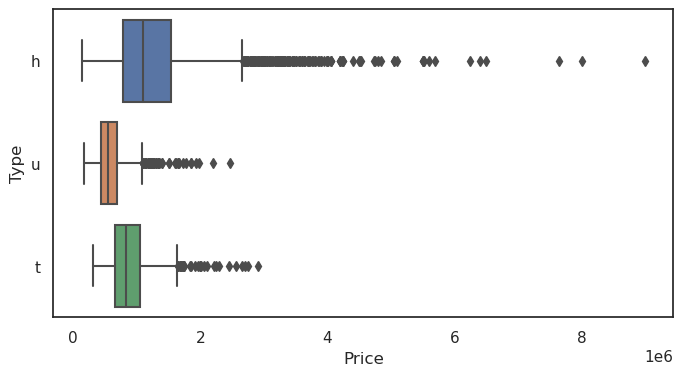

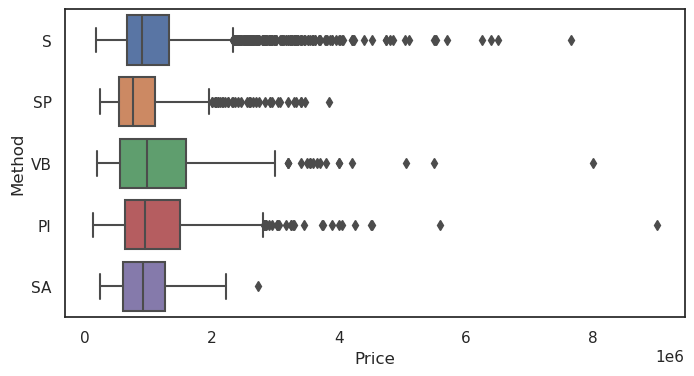

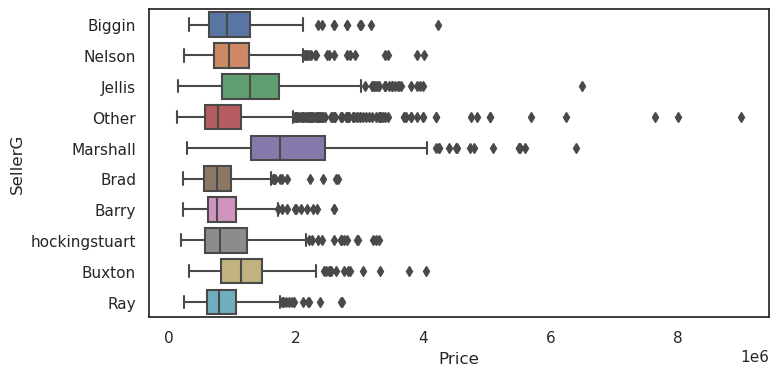

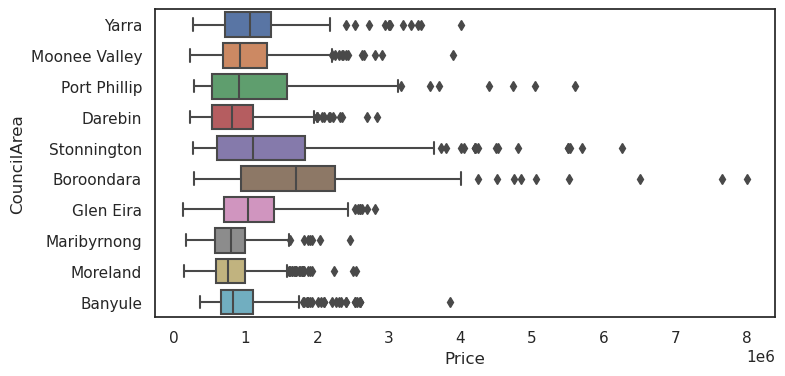

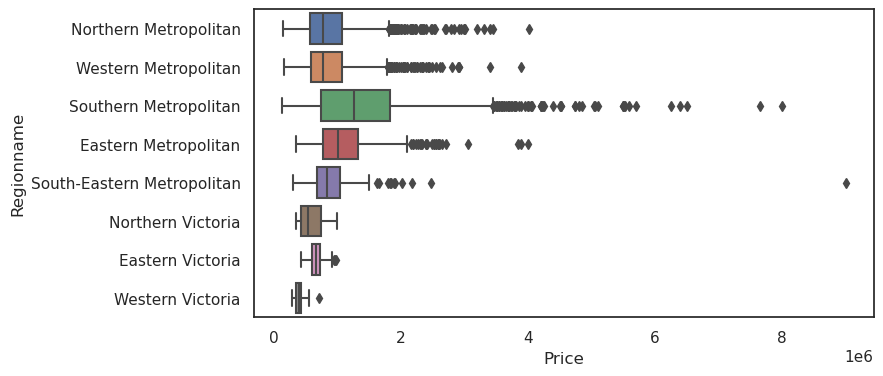

In [32]:
for col in preselected_cat_cols:
  values = df[col].value_counts(normalize=True).index[:10].tolist()
  plt.figure(figsize=(8,4))
  sns.boxplot(data=df[df[col].isin(values)], y=col, x='Price')
  plt.show()

En todos los casos vemos que hay valores para los cuales el precio tiende a tener precios mayores que en otros por lo que seleccionamos todas estas variables

In [33]:
selected_cat_cols = preselected_cat_cols

### Unificamos variables seleccionadas numéricas y categóricas

In [34]:
selected_cols = selected_num_cols + selected_cat_cols

In [35]:
selected_cols

['Rooms',
 'Bedroom2',
 'Bathroom',
 'Distance',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Type',
 'Method',
 'SellerG',
 'CouncilArea',
 'Regionname']

In [36]:
df = df[selected_cols + ['Price', 'Postcode']]

In [37]:
df.head()

,Rooms,Bedroom2,Bathroom,Distance,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Type,Method,SellerG,CouncilArea,Regionname,Price,Postcode
1,2,2.0,1.0,2.5,156.0,79.0,1900.0,-37.8079,144.9934,h,S,Biggin,Yarra,Northern Metropolitan,1035000.0,3067.0
2,3,3.0,2.0,2.5,134.0,150.0,1900.0,-37.8093,144.9944,h,SP,Biggin,Yarra,Northern Metropolitan,1465000.0,3067.0
4,4,3.0,1.0,2.5,120.0,142.0,2014.0,-37.8072,144.9941,h,VB,Nelson,Yarra,Northern Metropolitan,1600000.0,3067.0
6,3,4.0,2.0,2.5,245.0,210.0,1910.0,-37.8024,144.9993,h,S,Nelson,Yarra,Northern Metropolitan,1876000.0,3067.0
7,2,2.0,1.0,2.5,256.0,107.0,1890.0,-37.8060,144.9954,h,S,Nelson,Yarra,Northern Metropolitan,1636000.0,3067.0


## 2. 

<span style="color:green;font-size:18px">
    Consigna >>>>
</span>

Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

<span style="color:green;font-size:18px">
    <<<< Consigna
</span>

In [38]:
airbnb_df = pd.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv')

/tmp/ipykernel_20145/1222033671.py:1: DtypeWarning: Columns (35,77) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_df = pd.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv')


In [39]:
# Se estandariza el tipo de datos para la columna zipcode
airbnb_df['zipcode'] = pd.to_numeric(airbnb_df.zipcode, errors='coerce')

In [40]:
airbnb_df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighborhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighborhood,city,suburb,state,zipcode,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,9835,https://www.airbnb.com/rooms/9835,2.018120e+13,12/7/2018,Beautiful Room & House,NaN,"House: Clean, New, Modern, Quite, Safe. 10Km f...","House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,NaN,"YES ! The bus (305,309) is exactly two blocks ...","Kitchen, backyard, upstairs lounge. We'd like ...",As much as the guest wants.,Prefence would be given females or a couple,https://a0.muscache.com/im/pictures/44620/5a58...,33057,https://www.airbnb.com/users/show/33057,Manju,8/21/2009,AU,About us: We are an East Indian couple in our ...,a few days or more,0%,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,NaN,"['email', 'phone', 'reviews']",f,f,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105.0,"Bulleen, Australia",AU,Australia,-37.772684,145.092133,f,House,Private room,2,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,""Pets live on this property"",Do...",60,NaN,NaN,NaN,NaN,1,22,1,365,17 months ago,t,30,60,90,365,12/7/2018,4,5/24/2011,9/12/2015,90.0,9.0,10.0,10.0,10.0,9.0,9.0,f,NaN,f,strict_14_with_grace_period,f,f,1,0.04
1,10803,https://www.airbnb.com/rooms/10803,2.018120e+13,12/7/2018,Room in Cool Deco Apartment in Brunswick,A large air conditioned room with queen spring...,The apartment is Deco/Edwardian in style and h...,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,NaN,Easy transport options - the tram is right out...,Wifi. Bathroom and kitchen is shared but I mos...,I'm home mostly but sometimes I may be working...,Theres a yoga studio downstairs so if you see ...,https://a0.muscache.com/im/pictures/31323790/9...,38901,https://www.airbnb.com/users/show/38901,Lindsay,9/16/2009,"Melbourne, Victoria, Australia",As an artist working in animation and video I ...,NaN,NaN,f,https://a0.muscache.com/im/users/38901/profile...,https://a0.muscache.com/im/users/38901/profile...,Brunswick,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057.0,"Brunswick East, Australia",AU,Australia,-37.766505,144.980736,t,Apartment,Private room,2,1.0,1.0,1.0,Futon,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,H...",35,200.0,803.0,0.0,9.0,1,15,3,45,6 weeks ago,t,4,9,33,213,12/7/2018,108,1/12/2013,11/26/2018,87.0,9.0,8.0,9.0,9.0,9.0,9.0,f,NaN,t,moderate,t,t,1,1.50
2,12936,https://www.airbnb.com/rooms/12936,2.018120e+13,12/7/2018,St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,FREE WiFi FREE in-building remote controlled g...,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,First floor apartment with both lift and stair...,Our apartmen

In [41]:
airbnb_df.zipcode.value_counts()

3000.0     3367
3006.0     1268
3182.0     1135
3141.0      881
3004.0      728
3121.0      628
3008.0      616
3053.0      538
3181.0      460
3056.0      446
3065.0      387
3051.0      338
3184.0      335
3183.0      326
3068.0      308
3205.0      300
3066.0      297
3070.0      284
3003.0      267
3030.0      258
3067.0      258
3207.0      257
3128.0      214
3011.0      198
3002.0      197
3150.0      189
3031.0      188
3777.0      187
3057.0      185
3122.0      184
3032.0      176
3163.0      156
3168.0      152
3108.0      141
3072.0      141
3054.0      138
3058.0      133
3186.0      124
3161.0      122
3206.0      122
3142.0      118
3145.0      116
3071.0      114
3029.0      113
3101.0      107
3185.0      106
3129.0      104
3199.0      103
3052.0       90
3788.0       89
3799.0       89
3124.0       88
3083.0       87
3055.0       87
3013.0       82
3123.0       81
3162.0       81
3204.0       80
3149.0       77
3012.0       76
3078.0       74
3016.0       74
3084.0  

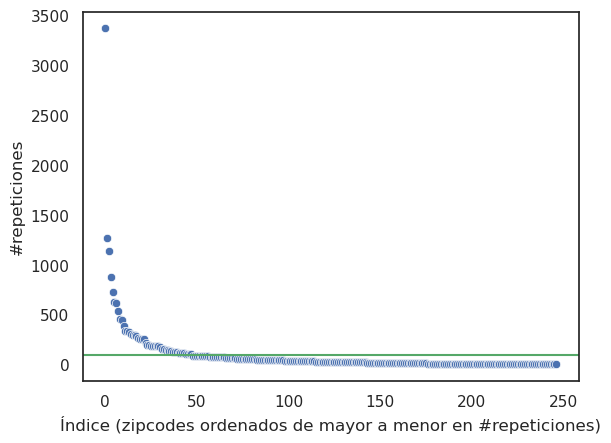

In [42]:
# Se realiza un scatter plot para apreciar cuántas entradas hay para cada zipcode
sns.scatterplot(data=airbnb_df.zipcode.value_counts().values) # Agregué 'data=' para que funcione sns
plt.axhline(100, color='g')
plt.xlabel("Índice (zipcodes ordenados de mayor a menor en #repeticiones)")
plt.ylabel("#repeticiones")
plt.show()

In [46]:
len(airbnb_df.zipcode.value_counts()[airbnb_df.zipcode.value_counts()<100])

199

De aquí en adelante solo consideraremos los zipcodes que tengan una cantidad mayor o igual a 100 registros para que la información agregada sea relevante. De acuerdo al análisis anterior, esto implica eliminar 199 zipcodes. Destacamos que el zipcode más abundante es "3000", el cual aparece 3367 veces.

In [47]:
value_counts = airbnb_df.zipcode.value_counts()
value_counts = value_counts[value_counts>=100]
airbnb_df_reducido = airbnb_df.copy()  # Copio el df para que no se pierda el anterior
airbnb_df_reducido = airbnb_df_reducido[airbnb_df_reducido['zipcode'].isin(value_counts.index.tolist())]

In [48]:
airbnb_price_by_zipcode = airbnb_df_reducido.groupby('zipcode')\
  .agg({'price': ['mean', 'count'], 'weekly_price': 'mean',
        'monthly_price': 'mean', 'number_of_reviews': ['sum', 'mean'],
        'review_scores_rating': ['min', 'max', 'mean']})\
  .reset_index()
# Flatten the two level columns
airbnb_price_by_zipcode.columns = [
  ' '.join(col).strip()
  for col in airbnb_price_by_zipcode.columns.values]

In [49]:
airbnb_price_by_zipcode.columns

Index(['zipcode', 'price mean', 'price count', 'weekly_price mean', 'monthly_price mean', 'number_of_reviews sum', 'number_of_reviews mean', 'review_scores_rating min', 'review_scores_rating max', 'review_scores_rating mean'], dtype='object')

In [50]:
# Rename columns
airbnb_price_by_zipcode = airbnb_price_by_zipcode.rename(
    columns={'price mean': 'airbnb_price_mean',
             'price count': 'airbnb_record_count',
             'weekly_price mean': 'airbnb_weekly_price_mean',
             'monthly_price mean': 'airbnb_monthly_price_mean',
             'number_of_reviews sum': 'airbnb_number_of_reviews_sum', 
             'number_of_reviews mean': 'airbnb_number_of_reviews_mean', 
             'review_scores_rating min': 'airbnb_review_scores_rating_min', 
             'review_scores_rating max': 'airbnb_review_scores_rating_max',
             'review_scores_rating mean': 'airbnb_review_scores_rating_mean'}
)

In [51]:
airbnb_price_by_zipcode.head()

,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,airbnb_number_of_reviews_sum,airbnb_number_of_reviews_mean,airbnb_review_scores_rating_min,airbnb_review_scores_rating_max,airbnb_review_scores_rating_mean
0,3000.0,150.504307,3367,918.738956,3407.204651,119050,35.357885,20.0,100.0,92.775407
1,3002.0,200.979695,197,956.379310,3712.714286,4768,24.203046,60.0,100.0,94.883562
2,3003.0,130.205993,267,760.200000,2629.500000,5351,20.041199,47.0,100.0,93.899038
3,3004.0,158.271978,728,1061.171429,3759.925926,16928,23.252747,20.0,100.0,93.636691
4,3006.0,188.851735,1268,1239.827273,4358.556701,35175,27.740536,20.0,100.0,94.168574


In [52]:
df_join = df.merge(
    airbnb_price_by_zipcode, how='left',
    left_on='Postcode', right_on='zipcode'
)
df_join.sample(5)

,Rooms,Bedroom2,Bathroom,Distance,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Type,Method,SellerG,CouncilArea,Regionname,Price,Postcode,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,airbnb_number_of_reviews_sum,airbnb_number_of_reviews_mean,airbnb_review_scores_rating_min,airbnb_review_scores_rating_max,airbnb_review_scores_rating_mean
3522,3,3.0,2.0,8.0,418.0,204.0,1995.0,-37.85710,144.87670,h,S,Other,Hobsons Bay,Western Metropolitan,1010000.0,3016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6308,4,4.0,1.0,20.6,641.0,110.0,1990.0,-37.61114,144.93683,h,S,YPA,NaN,Northern Metropolitan,595000.0,3064.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2563,3,3.0,2.0,9.9,540.0,146.0,1999.0,-37.71740,144.94100,h,SP,hockingstuart,Moreland,Northern Metropolitan,750000.0,3044.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1626,2,2.0,1.0,13.0,253.0,91.0,2012.0,-37.71170,144.91350,u,S,Stockdale,Moreland,Northern Metropolitan,620250.0,3046.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6849,3,3.0,1.0,12.9,607.0,102.0,1970.0,-37.69423,144.88002,h,S,Barry,NaN,Western Metropolitan,540000.0,3043.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. 

Se podría utilizar la variable Suburb que se encuentra en ambos datasets y posee una cardinalidad mayor al código postal en ambos casos

In [49]:
print('Cardinalidad Código postal:', melb_df.Postcode.nunique())
print('Cardinalidad Suburbio:', melb_df.Suburb.nunique())

Cardinalidad Código postal: 198
Cardinalidad Suburbio: 314


In [50]:
print('Cardinalidad Código postal:', airbnb_df.zipcode.nunique())
print('Cardinalidad Suburbio:', airbnb_df.suburb.nunique())

Cardinalidad Código postal: 48
Cardinalidad Suburbio: 153


Otra opción sería utilizar la latitud y longitud que se encuentra en ambos datasets y encontrar todas las propiedades que se encuentren a cierta distancia.

---
# Ejercicio 3 - Guardado final

In [51]:
df_join.head()

,Rooms,Bedroom2,Bathroom,Distance,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Type,Method,SellerG,CouncilArea,Regionname,Price,Postcode,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,airbnb_number_of_reviews_sum,airbnb_number_of_reviews_mean,airbnb_review_scores_rating_min,airbnb_review_scores_rating_max,airbnb_review_scores_rating_mean
0,2,2.0,1.0,2.5,156.0,79.0,1900.0,-37.8079,144.9934,h,S,Biggin,Yarra,Northern Metropolitan,1035000.0,3067.0,3067.0,130.624031,258.0,605.152174,2187.032258,4029.0,15.616279,20.0,100.0,95.288462
1,3,3.0,2.0,2.5,134.0,150.0,1900.0,-37.8093,144.9944,h,SP,Biggin,Yarra,Northern Metropolitan,1465000.0,3067.0,3067.0,130.624031,258.0,605.152174,2187.032258,4029.0,15.616279,20.0,100.0,95.288462
2,4,3.0,1.0,2.5,120.0,142.0,2014.0,-37.8072,144.9941,h,VB,Nelson,Yarra,Northern Metropolitan,1600000.0,3067.0,3067.0,130.624031,258.0,605.152174,2187.032258,4029.0,15.616279,20.0,100.0,95.288462
3,3,4.0,2.0,2.5,245.0,210.0,1910.0,-37.8024,144.9993,h,S,Nelson,Yarra,Northern Metropolitan,1876000.0,3067.0,3067.0,130.624031,258.0,605.152174,2187.032258,4029.0,15.616279,20.0,100.0,95.288462
4,2,2.0,1.0,2.5,256.0,107.0,1890.0,-37.8060,144.9954,h,S,Nelson,Yarra,Northern Metropolitan,1636000.0,3067.0,3067.0,130.624031,258.0,605.152174,2187.032258,4029.0,15.616279,20.0,100.0,95.288462


Guardamos el dataset en un archivo csv:

In [52]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/new_dataset.csv'

df_join.to_csv(path)

ModuleNotFoundError: No module named 'google'

In [55]:
import os  # Para crear el archivo csv en el cwd sin tener que usar colab.
df_join.to_csv('./out.csv')

---
# Ejercicios Opcionales

<span style="color:green;font-size:18px">
    Consigna >>>>
</span>

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)

<span style="color:green;font-size:18px">
    <<<< Consigna
</span>